In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
iris=load_iris()
X=iris.data 
y=iris.target 

In [3]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
iris_df=pd.DataFrame({
    'X1':X[:,0],
    'X2':X[:,0],
    'X3':X[:,0],
    'X4':X[:,0],
    'y':y
})

In [7]:
iris_df.head(10)

,X1,X2,X3,X4,y
0,5.1,5.1,5.1,5.1,0
1,4.9,4.9,4.9,4.9,0
2,4.7,4.7,4.7,4.7,0
3,4.6,4.6,4.6,4.6,0
4,5.0,5.0,5.0,5.0,0
5,5.4,5.4,5.4,5.4,0
6,4.6,4.6,4.6,4.6,0
7,5.0,5.0,5.0,5.0,0
8,4.4,4.4,4.4,4.4,0
9,4.9,4.9,4.9,4.9,0


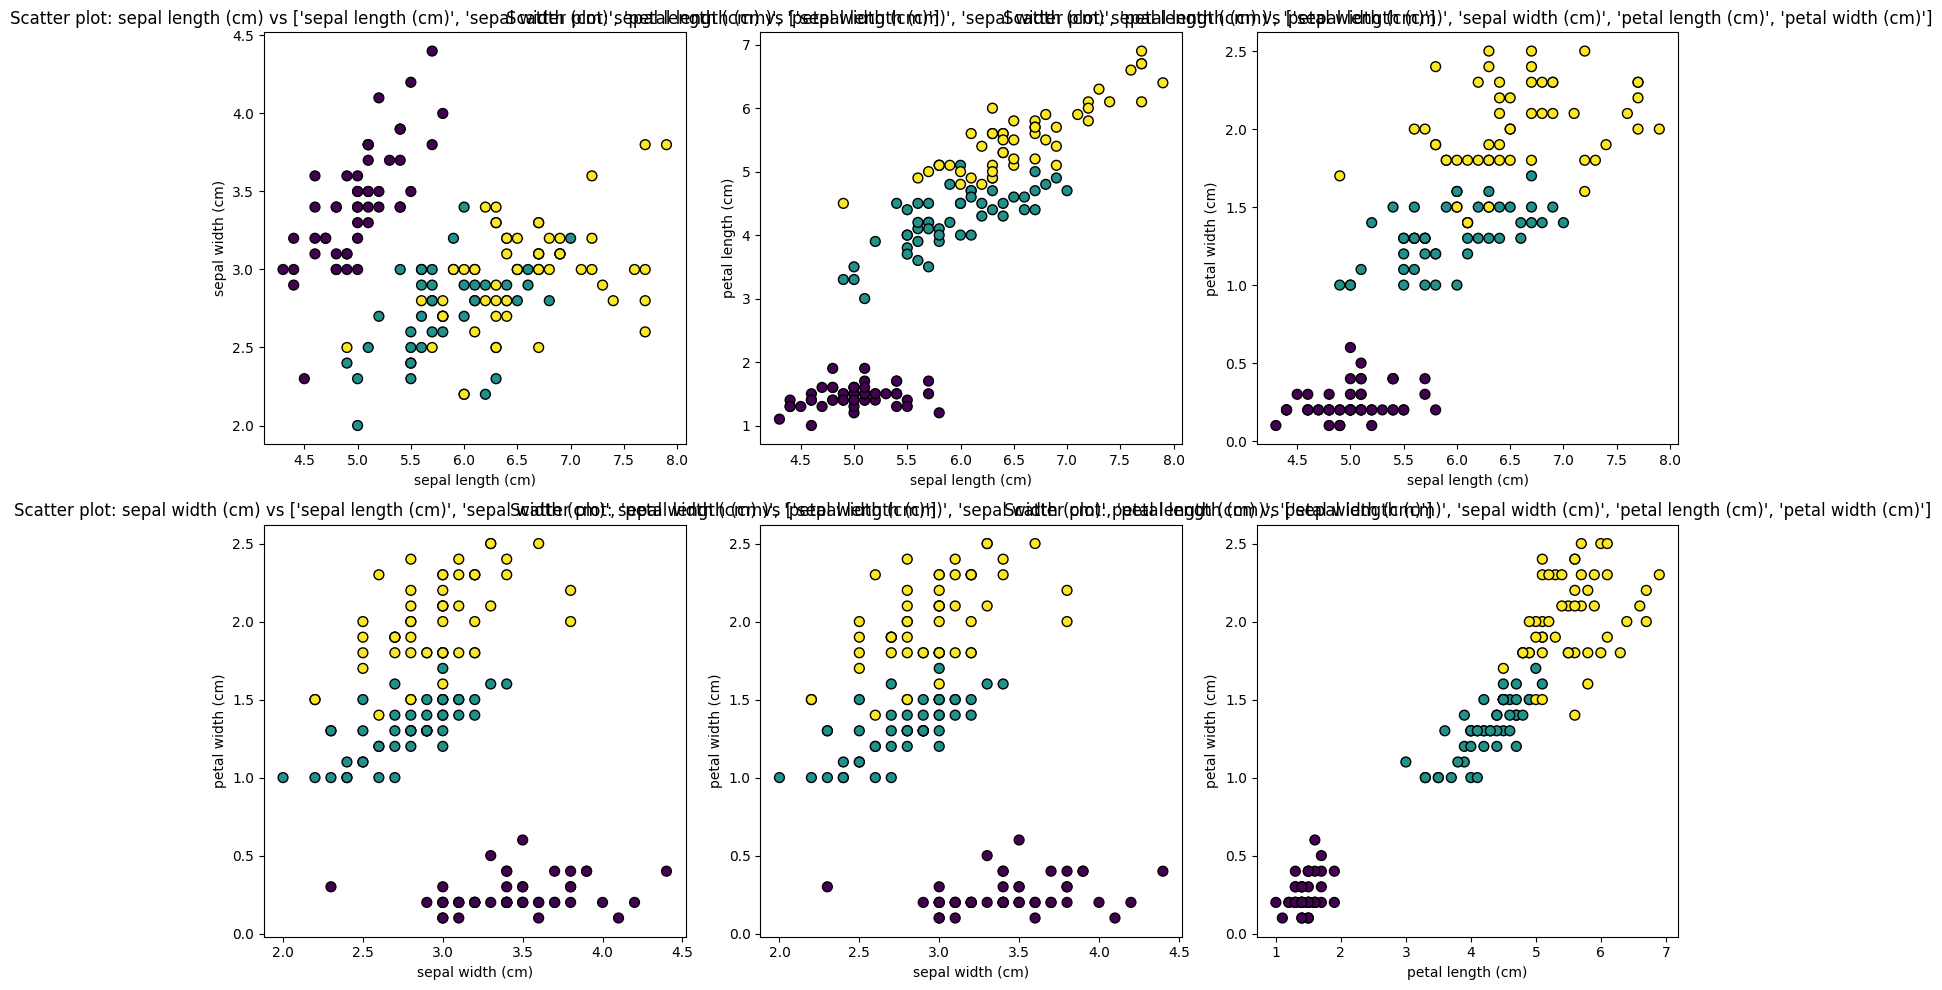

In [8]:
fig, axes=plt.subplots(2,3,figsize=(15,10))
feature_combinations=[(0,1),(0,2),(0,3),(1,3),(1,3), (2,3)]

for ax, features in zip(axes.flatten(), feature_combinations):
    feature1, feature2 = features 
    ax.scatter(X[:,feature1], X[:,feature2],c=y, cmap='viridis', edgecolor='k', s=50)
    ax.set_xlabel(iris.feature_names[feature1])
    ax.set_ylabel(iris.feature_names[feature2])
    ax.set_title(f'Scatter plot: {iris.feature_names[feature1]} vs {iris.feature_names}')

plt.tight_layout()
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [10]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float).to(device)
y_train_tensor=torch.tensor(y_train, dtype=torch.int64).to(device)
X_test_tensor=torch.tensor(X_test, dtype=torch.float).to(device)
y_test_tensor=torch.tensor(y_test, dtype=torch.int64).to(device)


In [12]:
class SimpleClassifier(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.layer_1=nn.Linear(in_features, 120)
        self.layer_2=nn.Linear(120, 10)
        self.layer_3=nn.Linear(10, out_features)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x 

In [13]:
in_features=X_train.shape[1]
num_classes=len(set(y))

model=SimpleClassifier(in_features, num_classes).to(device)

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(), lr=0.01)

X_train_tensor.type()

'torch.FloatTensor'

In [22]:
num_epochs=1000

for epochs in range(num_epochs):
    model.train()
    #forward pass
    outputs=model(X_train_tensor)
    loss=criterion(outputs, y_train_tensor)
    
    _, predicted_labels=torch.max(outputs,1)
    correct_predictions=(predicted_labels==y_train_tensor).sum().item()
    total_samples=len(y_train_tensor)
    acc=correct_predictions/total_samples

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epochs+1) % 10 == 0:
        print(f'Epoch [{epochs+1}/{num_epochs}], Loss:{loss.item():.4f}, Accuracy:{acc:.4f}')


Epoch [10/1000], Loss:0.0612, Accuracy:0.9750
Epoch [20/1000], Loss:0.0611, Accuracy:0.9750
Epoch [30/1000], Loss:0.0610, Accuracy:0.9750
Epoch [40/1000], Loss:0.0609, Accuracy:0.9750
Epoch [50/1000], Loss:0.0608, Accuracy:0.9750
Epoch [60/1000], Loss:0.0606, Accuracy:0.9750
Epoch [70/1000], Loss:0.0605, Accuracy:0.9750
Epoch [80/1000], Loss:0.0604, Accuracy:0.9750
Epoch [90/1000], Loss:0.0603, Accuracy:0.9750
Epoch [100/1000], Loss:0.0602, Accuracy:0.9750
Epoch [110/1000], Loss:0.0601, Accuracy:0.9750
Epoch [120/1000], Loss:0.0600, Accuracy:0.9750
Epoch [130/1000], Loss:0.0599, Accuracy:0.9750
Epoch [140/1000], Loss:0.0598, Accuracy:0.9750
Epoch [150/1000], Loss:0.0597, Accuracy:0.9750
Epoch [160/1000], Loss:0.0596, Accuracy:0.9750
Epoch [170/1000], Loss:0.0595, Accuracy:0.9750
Epoch [180/1000], Loss:0.0594, Accuracy:0.9750
Epoch [190/1000], Loss:0.0593, Accuracy:0.9750
Epoch [200/1000], Loss:0.0593, Accuracy:0.9750
Epoch [210/1000], Loss:0.0592, Accuracy:0.9750
Epoch [220/1000], Loss

In [23]:
model.eval()
with torch.inference_mode():
    outputs=model(X_test_tensor)
    _, predicted=torch.max(outputs, 1)
    accuracy=accuracy_score(y_test, predicted.numpy())

    predicted_tensor=predicted.clone().detach()
    loss=criterion(outputs, y_test_tensor)

    print(f'Loss: {loss.item():.4f}, Accuracy:{accuracy:.4f}')


Loss: 0.0368, Accuracy:1.0000
